<a href="https://colab.research.google.com/github/maryclareok/cnnmodel87-89percentaccuracyfinal/blob/master/fire%2Csmoke%2Cfireandsmoke%2Cnonfireandsmokedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import os
import numpy as np

# Define directories
base_dir = '/content/drive/MyDrive/work/training'
classes = ['fire', 'fire and smoke', 'neither', 'smoke']

# Preprocess the data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=classes,
    subset='training')

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=classes,
    subset='validation')

Found 965 images belonging to 4 classes.
Found 239 images belonging to 4 classes.


In [27]:
# @title
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=classes)

# Define the model
model_12 = Sequential()
model_12.add(Conv2D(32, (5, 5), activation='relu', input_shape=(64, 64, 3)))
model_12.add(MaxPooling2D(pool_size=(2, 2)))
model_12.add(Conv2D(64, (4, 4), activation='relu'))
model_12.add(MaxPooling2D(pool_size=(2, 2)))
model_12.add(Flatten())
model_12.add(Dense(100))
# model.add(Dense(64, activation='tanh'))  # 'tanh' activation
# model.add(Dropout(0.5))
model_12.add(Dense(128, activation='relu'))
model_12.add(Dense(4, activation='softmax'))

# Compile the model
model_12.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_12.fit(train_generator, epochs=100, validation_data=validation_generator)

Found 1204 images belonging to 4 classes.
Epoch 1/100
38/38 [==============================] - 23s 557ms/step - loss: 1.2554 - accuracy: 0.4012 - val_loss: 1.1930 - val_accuracy: 0.5021
Epoch 2/100
38/38 [==============================] - 19s 505ms/step - loss: 1.0932 - accuracy: 0.5208 - val_loss: 1.0361 - val_accuracy: 0.5607
Epoch 3/100
38/38 [==============================] - 19s 505ms/step - loss: 1.0479 - accuracy: 0.5349 - val_loss: 1.0538 - val_accuracy: 0.5732
Epoch 4/100
38/38 [==============================] - 22s 577ms/step - loss: 1.0185 - accuracy: 0.5565 - val_loss: 0.9708 - val_accuracy: 0.6234
Epoch 5/100
38/38 [==============================] - 19s 500ms/step - loss: 0.9880 - accuracy: 0.5872 - val_loss: 0.9669 - val_accuracy: 0.6360
Epoch 6/100
38/38 [==============================] - 19s 506ms/step - loss: 0.9650 - accuracy: 0.5897 - val_loss: 0.9261 - val_accuracy: 0.6485
Epoch 7/100
38/38 [==============================] - 18s 493ms/step - loss: 0.9259 - accuracy:

8/8 [==============================] - 4s 489ms/step


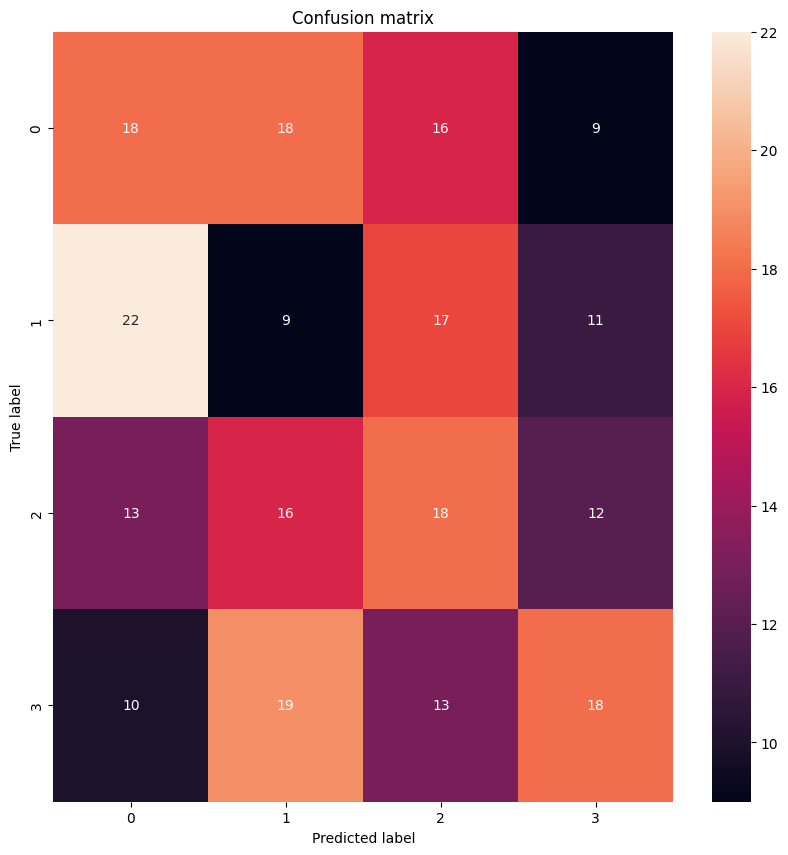

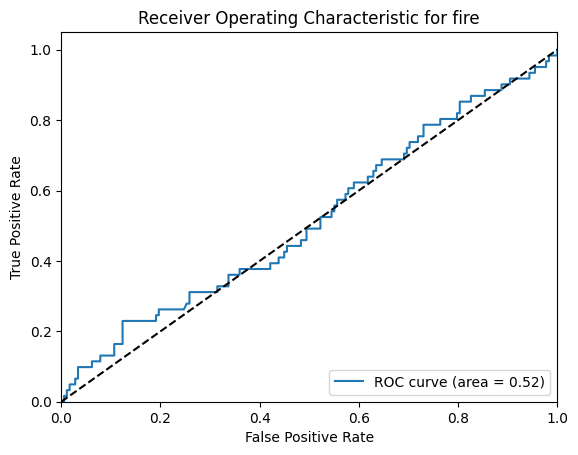

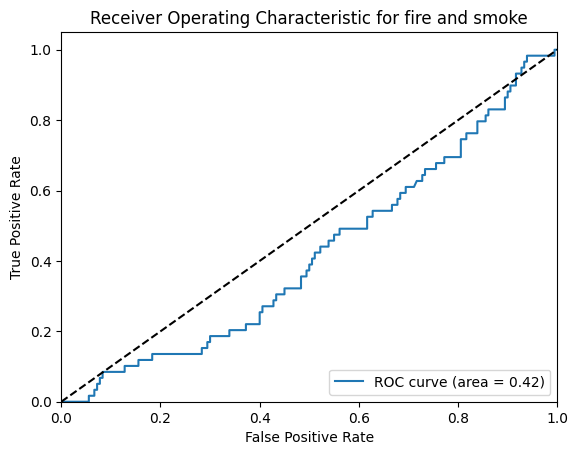

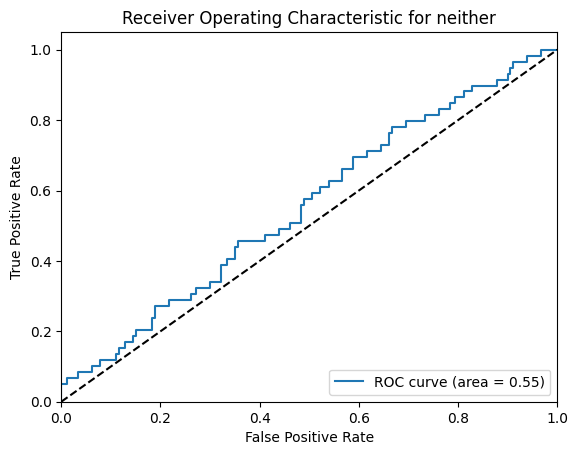

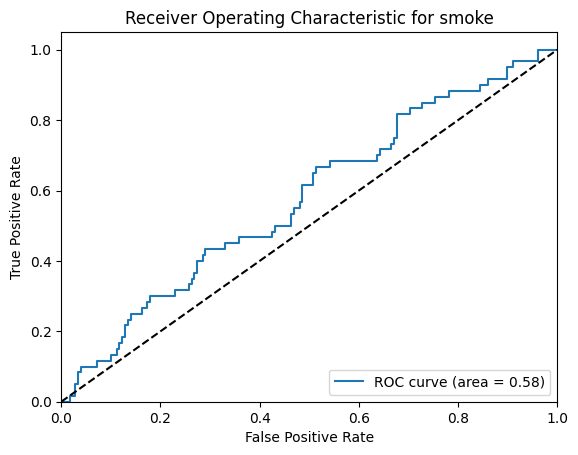

In [28]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the classes
pred = model_12.predict(validation_generator, verbose=1)
predicted_classes = np.argmax(pred, axis=1)

# Get the confusion matrix
cm = confusion_matrix(validation_generator.classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Get the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    try:
        fpr[i], tpr[i], _ = roc_curve(validation_generator.classes == i, pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    except ValueError:
        print(f"ROC curve computation failed for class {i}. Continuing with next class...")
        continue

# Plot the ROC curve
for i in range(len(classes)):
    if i in fpr:
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for '+classes[i])
        plt.legend(loc="lower right")
        plt.show()


In [33]:
# Evaluate the model
eval_result = model_12.evaluate(validation_generator)
print(f'Test loss: {eval_result[0]}, Test accuracy: {eval_result[1]}')

8/8 [==============================] - 6s 728ms/step - loss: 0.2866 - accuracy: 0.8912
Test loss: 0.2865980565547943, Test accuracy: 0.8912134170532227


1/1 [==============================] - 0s 49ms/step
The model predicts that the image is of class: smoke


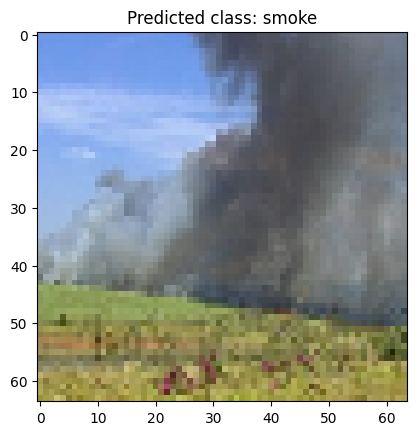

In [41]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Predict a single image
img_path = '/content/drive/MyDrive/work/test17.jpg'  # replace with your image path
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = img_batch/255.
prediction = model_12.predict(img_preprocessed)

# Get the class with the highest probability
predicted_class_index = np.argmax(prediction)
predicted_class = classes[predicted_class_index]

print(f'The model predicts that the image is of class: {predicted_class}')

# Display the image
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class}')
plt.show()


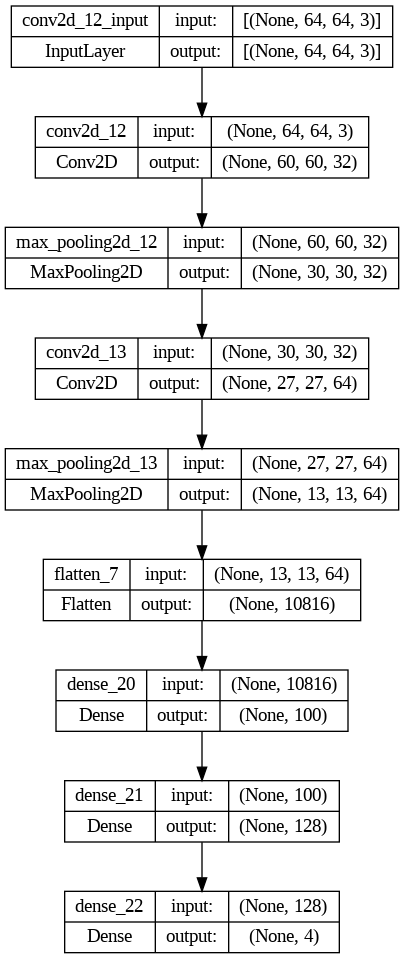

In [30]:
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model_12, to_file='model.png', show_shapes=True, show_layer_names=True)


In [32]:
from tensorflow.keras import metrics
from sklearn.metrics import classification_report
import numpy as np

# Predict the classes
validation_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)
predictions = model_12.predict(validation_generator, steps=validation_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = validation_generator.classes

# Get the classification report
report = classification_report(true_classes, predicted_classes, target_names=list(validation_generator.class_indices.keys()))
print(report)

# Calculate AUC
auc = metrics.AUC()
auc.update_state(true_classes, predicted_classes)
print('AUC: ', auc.result().numpy())


8/8 [==============================] - 5s 567ms/step
                precision    recall  f1-score   support

          fire       0.24      0.25      0.24        61
fire and smoke       0.24      0.25      0.25        59
       neither       0.25      0.27      0.26        59
         smoke       0.26      0.22      0.24        60

      accuracy                           0.25       239
     macro avg       0.25      0.25      0.25       239
  weighted avg       0.25      0.25      0.25       239

AUC:  0.48811936
